In [16]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from typing import Optional

In [3]:
def load_data_to_data_frame(file_path:str,sep:str=None)->Optional[DataFrame]:
  '''
  Load data from a local file path.
  Args:
      - file_path (str): The path to the file to be loaded
  Returns:
      - Optional[DataFrame]: A panda DataFrame containing the loaded data
  '''
  try:
    df = pd.read_csv(file_path,sep=sep)
    return df
  except:
    print("Error loading data")
    return None

In [4]:
df = load_data_to_data_frame('../data/bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.shape

(45211, 17)

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
colmns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [8]:
df = df[colmns]

In [44]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5
month,may,may,may,may,may
duration,261,151,76,92,198


In [23]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


#### Question 1

In [12]:
df.education.mode()

0    secondary
Name: education, dtype: object

#### Question 2

In [34]:
numerical_col = df.select_dtypes(include=[np.number]).columns
numerical_col

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

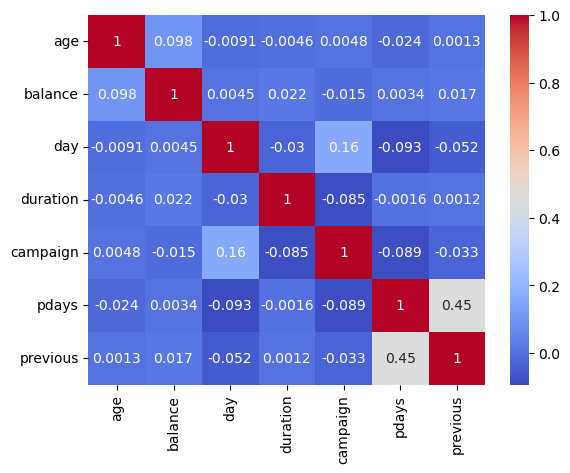

In [39]:
corr_matrix = df[numerical_col].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [33]:
# Find the maximum value (ignoring self-correlation by excluding diagonal values)
max_corr_value = corr_matrix.where(~corr_matrix.isin([1])).max().max()

# Display the maximum correlation value
print("Max correlation value:", max_corr_value)

Max correlation value: 0.4548196354805043


In [38]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [42]:
df['y'] = df['y'].replace({'no': 0, 'yes': 1}).infer_objects(copy=False)

In [43]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5
month,may,may,may,may,may
duration,261,151,76,92,198


In [46]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df,test_size=0.2, random_state=42)

In [47]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [48]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [51]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown,0
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown,0
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown,0
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown,0
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown,0


In [50]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [52]:
y_train = df_train['y'].values
y_val = df_val['y'].values
y_test = df_test['y'].values

In [53]:
del df_train['y']
del df_val['y']
del df_test['y']

In [56]:
categorical_col = df.select_dtypes(include=[object]).columns
categorical_col 

Index(['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome'],
      dtype='object')

#### Question 3

In [61]:
from sklearn.metrics import mutual_info_score

In [62]:
def mutual_info_y_score(series):
    return mutual_info_score(series, df_full_train['y'])  

In [71]:
mi = df_full_train[categorical_col].apply( mutual_info_y_score).sort_values(ascending=False).to_frame(name='mutual_info_score')
round(mi,2)

,mutual_info_score
poutcome,0.03
month,0.02
contact,0.01
housing,0.01
job,0.01
education,0.00
marital,0.00


#### Question 4